In [2]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing  import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn import svm , metrics

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score,f1_score,ConfusionMatrixDisplay

## Reading Data

In [5]:
creditCard_data = pd.read_csv("/Users/wei/Kaggle/Credit Card Fraud Detection/creditcard_2023.csv")
print("shape of the data: ",creditCard_data.shape)

shape of the data:  (568630, 31)


In [6]:
creditCard_data.head(10)

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
5,5,0.025302,-0.140514,1.191138,-0.707979,0.430490,0.458973,0.611050,-0.092629,0.180811,...,-0.187739,-0.538518,-0.050465,-0.631553,-0.456480,0.252670,0.066681,0.095812,6901.49,0
6,6,1.016482,-0.397181,0.497868,-0.144463,0.331022,0.629243,0.431262,-0.134007,0.796159,...,-0.171137,-0.287017,-0.178197,-1.297597,1.182503,-0.604228,-0.198163,-0.087619,18954.45,0
7,7,-0.051306,-0.007194,1.139941,-0.877880,0.684668,0.714326,0.892615,-0.908409,0.901938,...,0.620676,-0.920426,0.034660,-1.091527,-0.742075,-0.104863,-1.382522,-2.748268,12298.23,0
8,8,-0.130680,-0.349547,0.425786,-0.760444,1.702777,2.324816,0.568968,0.049100,0.273118,...,-0.132787,-0.284700,-0.227779,2.248754,0.534846,-0.929738,-0.224385,0.243790,22052.90,0
9,9,0.058419,-0.093507,1.117270,-0.735172,0.466111,0.332371,0.683425,-0.136674,0.096409,...,-0.203634,-0.601581,-0.145082,-0.654783,-0.196621,0.226818,0.057119,0.100629,210.35,0


## Preprocessing the data

In [7]:
## checking for null values if any
creditCard_data.isna().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
## checking for duplicates if any 
creditCard_data[creditCard_data.duplicated()]

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [9]:
## extract the features and the label 
y = creditCard_data.iloc[:,-1]
x = creditCard_data.iloc[:,1:30]

print("x shape:" , x.shape)
print("y shape: ",y.shape)

x shape: (568630, 29)
y shape:  (568630,)


In [10]:
## normalize the data 
scaler = MinMaxScaler()
x_normalized = scaler.fit_transform(x)
x_normalized[0]

array([0.56509083, 0.91106842, 0.32814324, 0.59703704, 0.19142831,
       0.46201845, 0.02191858, 0.63576003, 0.18645748, 0.10895522,
       0.58662371, 0.11607518, 0.38149206, 0.12485038, 0.30807256,
       0.04972865, 0.31619636, 0.29933661, 0.68140328, 0.72429707,
       0.70157444, 0.39044943, 0.48643805, 0.24856315, 0.48660636,
       0.56259943, 0.08419483, 0.33436928, 0.74748436])

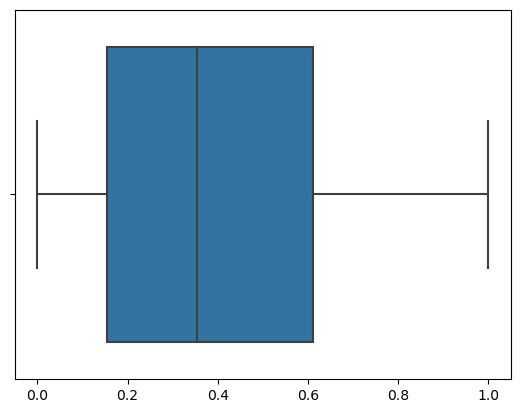

In [11]:
## check for outliers if any 
sns.boxplot(x = x_normalized)
plt.show()

In [12]:
## reduce the dimension of the data 
pca = PCA()
pca.fit_transform(x_normalized)
cum_var = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cum_var >= 0.95)+1
print("number of components needed to retain 95% of the data: ",num_components)

number of components needed to retain 95% of the data:  11


In [13]:
cum_var

array([0.3930391 , 0.6985914 , 0.76273027, 0.81567022, 0.84436258,
       0.86883517, 0.89078754, 0.90970961, 0.92632565, 0.94153327,
       0.95430386, 0.96535532, 0.97291442, 0.97948193, 0.98376147,
       0.98784078, 0.99084147, 0.99299465, 0.99465602, 0.99595253,
       0.99696738, 0.99773861, 0.99842395, 0.99887756, 0.99927116,
       0.9995691 , 0.99978318, 0.99996911, 1.        ])

In [14]:
pca2 = PCA(n_components= num_components)
x_reduced = pca2.fit_transform(x_normalized)
print('x shape after reduction: ', x_reduced.shape)

x shape after reduction:  (568630, 11)


In [15]:
x_train , x_test, y_train , y_test = train_test_split(x_reduced,y,train_size = 0.7)
print("x_train shape:" , x_train.shape)
print("y_train shape:" , y_train.shape)
print("x_test shape:" , x_test.shape)
print("y_test shape:" , y_test.shape)

x_train shape: (398041, 11)
y_train shape: (398041,)
x_test shape: (170589, 11)
y_test shape: (170589,)


## Apply Models

### All Traditional Classifier Models

In [16]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Linear Support Vector Classifier', LinearSVC()),
    ('Decision Tree Classifier', DecisionTreeClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('XGBoost', XGBClassifier()),
    ('GradientBoostingClassifier', GradientBoostingClassifier()),
    ('RandomForestClassifier', RandomForestClassifier()),
    ('AdaBoostClassifier', AdaBoostClassifier())
    
]

In [17]:
results = []
for model_name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    f1 = f1_score(y_test, y_pred)  # Calculate F1-score
    results.append((model_name, f1))
    hyperparameters = model.get_params()
    model_name = model.__class__.__name__
    model_score = f1
    print("\nModel Name:", model_name)
    print("\n")
    print("Model Hyperparameters:")
    print(hyperparameters)
    print("\n")
    print("F1 Score:", model_score)
    print("*" * 50)
    sorted_results = sorted(results, key=lambda x: x[1], reverse=True)


Model Name: LogisticRegression


Model Hyperparameters:
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


F1 Score: 0.9420207339928357
**************************************************


/Users/wei/anaconda3/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(



Model Name: LinearSVC


Model Hyperparameters:
{'C': 1.0, 'class_weight': None, 'dual': 'warn', 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': None, 'tol': 0.0001, 'verbose': 0}


F1 Score: 0.9418632993870647
**************************************************

Model Name: DecisionTreeClassifier


Model Hyperparameters:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


F1 Score: 0.9949665602498077
**************************************************

Model Name: GaussianNB


Model Hyperparameters:
{'priors': None, 'var_smoothing': 1e-09}


F1 Score: 0.9177291227381945
**************************************************

Model Name: KNeighborsClassifier


Model Hyper

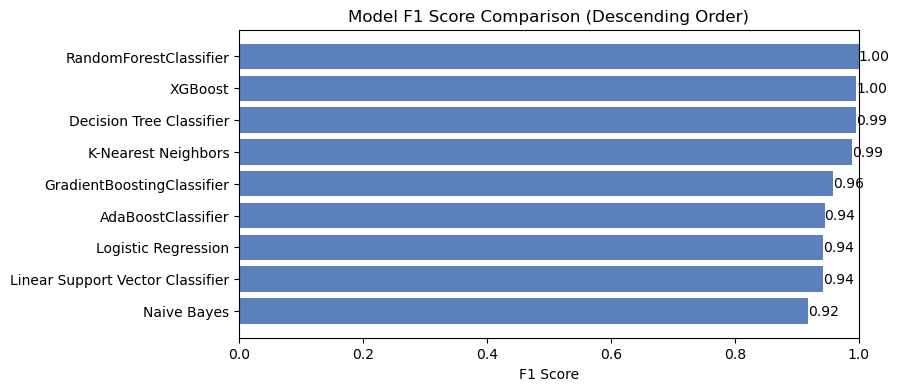

In [36]:
model_names = [model[0] for model in sorted_results]
f1_scores = [model[1] for model in sorted_results]

plt.figure(figsize=(8, 4))
bars = plt.barh(model_names, f1_scores, color='#5C80BC')
plt.xlabel('F1 Score')
plt.title('Model F1 Score Comparison (Descending Order)')
plt.xlim(0, 1)
plt.gca().invert_yaxis()

for bar, score in zip(bars, f1_scores):
    plt.text(score, bar.get_y() + bar.get_height() / 2, f'{score:.2f}', va='center')

plt.show()

### The best one is RandomForestClassifier

In [21]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10],
    'n_estimators': [100, 200, 500]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [30]:
rf.get_params(deep=True)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [31]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [32]:
y_pred = rf.predict(x_test)

test_f1_score = f1_score(y_test, y_pred)
print("Test Set F1 Score of the Base Model:", test_f1_score)

Test Set F1 Score of the Base Model: 0.9994983082487457


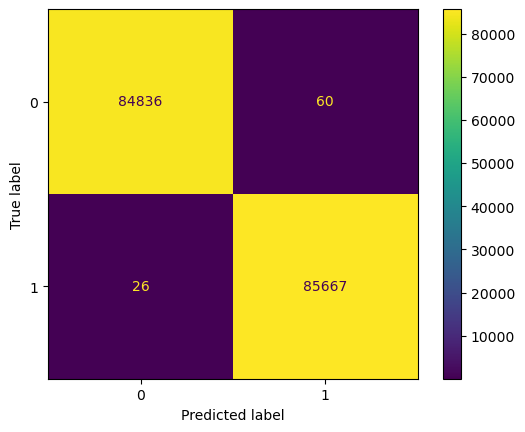

In [33]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [22]:
# Fit the grid search to the data
grid_search.fit(x_train, y_train)
# Print the best hyperparameters
print('Best hyperparameters:',  grid_search.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END bootstrap=True, max_depth=80, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time= 8.3min
[CV] END bootstrap=True, max_depth=80, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time= 3.9min
[CV] END bootstrap=True, max_depth=80, min_samples_leaf=3, min_samples_split=10, n_estimators=500; total time=19.1min
[CV] END bootstrap=True, max_depth=80, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time= 7.7min
[CV] END bootstrap=True, max_depth=80, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=19.5min
[CV] END bootstrap=True, max_depth=90, min_samples_leaf=3, min_samples_split=10, n_estimators=500; total time=19.6min
[CV] END bootstrap=True, max_depth=90, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time= 7.8min
[CV] END bootstrap=True, max_depth=90, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=19.

[CV] END bootstrap=True, max_depth=80, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time= 4.2min
[CV] END bootstrap=True, max_depth=80, min_samples_leaf=3, min_samples_split=8, n_estimators=500; total time=19.6min
[CV] END bootstrap=True, max_depth=80, min_samples_leaf=4, min_samples_split=8, n_estimators=500; total time=19.1min
[CV] END bootstrap=True, max_depth=90, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time= 7.7min
[CV] END bootstrap=True, max_depth=90, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time= 3.9min
[CV] END bootstrap=True, max_depth=90, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time= 7.8min
[CV] END bootstrap=True, max_depth=90, min_samples_leaf=3, min_samples_split=10, n_estimators=500; total time=19.9min
[CV] END bootstrap=True, max_depth=90, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=19.4min
[CV] END bootstrap=True, max_depth=100, min_samples_leaf=3, 

In [24]:
best_grid = grid_search.best_estimator_

In [25]:
y_pred = best_grid.predict(x_test)

test_f1_score = f1_score(y_test, y_pred)

print("Test Set F1 Score of the Best Model:", test_f1_score)

Test Set F1 Score of the Best Model: 0.9992240780822478


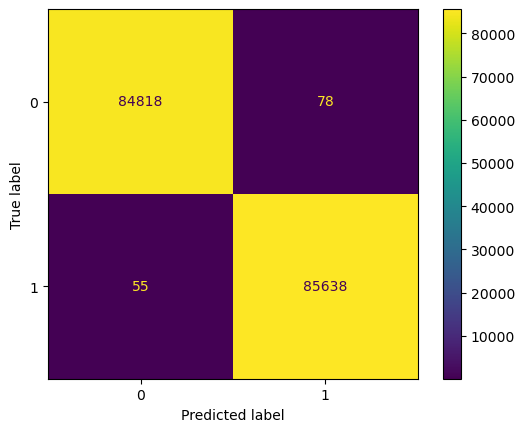

In [29]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [27]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy*100)

Accuracy:  99.92203483225765
